 # Earthquake Damage Predictor
 
To predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal based on aspects of building location and construction

Data Source: https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/

 ### Import of Standard Tools Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [2]:
train_values= pd.read_csv(r"C:\Users\NATHAN\Desktop\Data_DS_Projects\Earthquake_Damage_Predictor\dataset\train_values.csv",index_col='building_id')
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Data Loading into Dataframe
train_labels = pd.read_csv(r"C:\Users\NATHAN\Desktop\Data_DS_Projects\Earthquake_Damage_Predictor\dataset\train_labels.csv",index_col='building_id')
train_labels.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


In [4]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

## Explore the Data

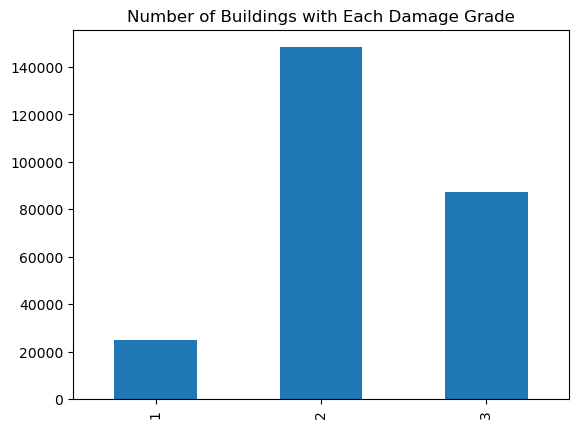

In [5]:
(train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"));

In [6]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_values_subset = train_values[selected_features]

### The relationships between our numeric features and labels

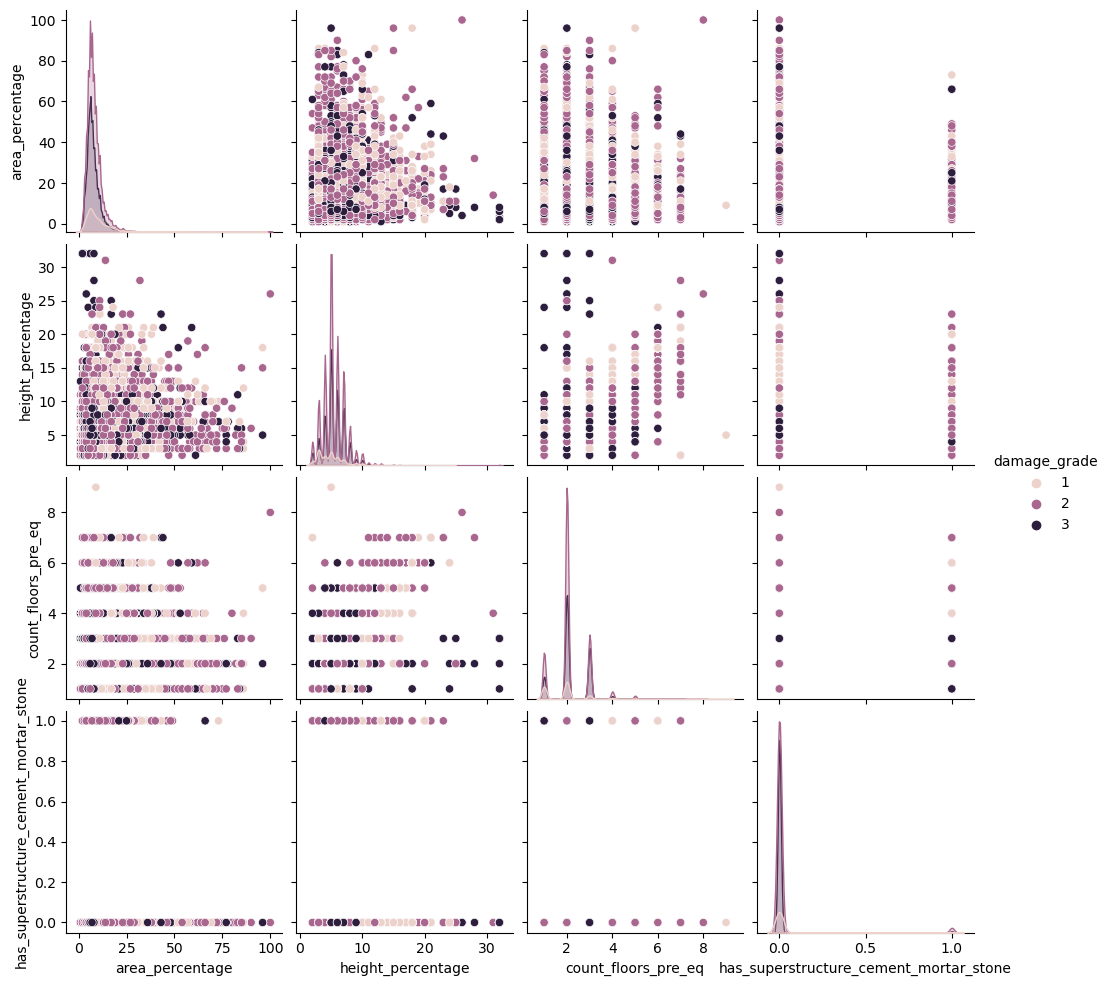

In [7]:
sns.pairplot(train_values_subset.join(train_labels), 
             hue='damage_grade');

## Pre-process the Data

In [8]:
train_values_subset = pd.get_dummies(train_values_subset)

In [9]:
train_values_subset.head(50)

,area_percentage,height_percentage,count_floors_pre_eq,has_superstructure_cement_mortar_stone,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t
building_id,,,,,,,,,,,,
802906,6,5,2,0,0,0,1,0,0,0,0,1
28830,8,7,2,0,0,0,1,0,0,0,1,0
94947,5,5,2,0,0,0,1,0,0,0,0,1
590882,6,5,2,0,0,0,1,0,0,0,0,1
201944,8,9,3,0,0,0,1,0,0,0,0,1
333020,9,5,2,0,0,0,1,0,0,0,0,1
728451,3,4,2,0,0,0,1,0,0,1,0,0
475515,8,6,2,0,0,0,0,0,1,0,0,1
441126,8,6,2,0,0,0,1,0,0,0,0,1


## Build the Model

In [10]:
pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=42))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [11]:
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)
gs.fit(train_values_subset, train_labels.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 5],
                         'randomforestclassifier__n_estimators': [50, 100]})

In [12]:
# Best params
gs.best_params_

{'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__n_estimators': 50}

In [ ]:
# And the in-sample F1 micro score.

# Note that we use the class predictions (.predict()), not the class probabilities (.predict_proba()).

In [13]:
in_sample_preds = gs.predict(train_values_subset)
f1_score(train_labels, in_sample_preds, average='micro')

0.5894067942947264

In [ ]:
# Remember, a perfect micro F1 score would be 1, so this is not a bad start given that we have 3 classes. Let's make some predictions on the test set!

# TIME TO PREDICT AND SUBMIT
For the F1 Micro metric, we'll be using the class predictions, not the class probabilities. Let's load up the data, process it, and see what we get on the leaderboard.

In [14]:
test_values= pd.read_csv(r"C:\Users\NATHAN\Desktop\Data_DS_Projects\Earthquake_Damage_Predictor\dataset\test_values.csv",index_col='building_id')

In [15]:
test_values_subset = test_values[selected_features]
test_values_subset = pd.get_dummies(test_values_subset)

In [16]:
# Make Predictions
#Note that we use the class predictions, not the class probabilities.

predictions = gs.predict(test_values_subset)

In [17]:
# Save Submission
# We can use the column name and index from the submission format to ensure our predictions are in the form


submission_format = pd.read_csv(r"C:\Users\NATHAN\Desktop\Data_DS_Projects\Earthquake_Damage_Predictor\dataset\submission_format.csv",index_col='building_id')

In [18]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,2
421793,2


In [19]:
my_submission.to_csv('submission.csv')